# Introduction to statistics with python

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

# Sampling and testing

## 1. Random sampling with numpy

### 1.1. Simple random data
[Numpy](http://docs.scipy.org/doc/numpy/reference/routines.random.html#random-generator) offers several routines to generate easily uniform and random samples:

In [1]:
import numpy as np
import numpy.random as rdm
np.set_printoptions(precision=2)

rdm.rand(4, 4)  # Uniform sampling

array([[0.36, 0.43, 0.96, 0.11],
       [0.81, 0.92, 0.93, 0.99],
       [0.7 , 0.57, 0.26, 0.28],
       [0.96, 0.58, 0.91, 0.2 ]])

In [2]:
rdm.randn(4, 4)  # Standard normal sampling

array([[-0.3 ,  0.12, -0.3 ,  0.56],
       [-0.07, -1.26,  2.08,  0.41],
       [-1.21,  0.52,  0.47, -1.18],
       [ 1.31,  0.16,  0.16, -2.04]])

In [3]:
rdm.randint(0, 10, size=(2, 3))  # Discrete uniform sampling (10 exclusive)

array([[5, 9, 9],
       [6, 4, 7]])

In the case where the sampled integers are supposed to index an array, on can replace:

In [4]:
a = np.arange(10)*10

ind = rdm.randint(0, 5, size=7)
a[ind]

array([30, 30, 30, 40, 30, 10, 40])

by:

In [5]:
rdm.choice(a, size=7)

array([50, 20, 90, 60, 60,  0, 10])

The previous routines sample integers with replacement.
To sample without replacement, one can use:

In [6]:
rdm.permutation(10)[:7]  # 7 first item of a random permutation of [0, …, 9]

array([3, 6, 5, 9, 1, 7, 8])

Note that one can also directly permute an array with a copy (*permutation*) or in-place (*shuffle*), instead of generating random indexes.

### 1.2. Random generator
It is obvious that random generators used in scientific computing are in fact pseudo-random generators.
As a consequence, the practitioner is able to control them to a certain extent.
In a way, this is good news for reproducible science !

Both examples below illustrate how to replay a random sampling.

In [7]:
for it in range(3):
    rdm.seed(it)  # Seed the generator to the current iteration number
    print(rdm.randint(100, size=3))

[44 47 64]
[37 12 72]
[40 15 72]


In [8]:
for it in range(3):
    rdm.seed(it)  # Seed the generator to the current iteration number
    print(rdm.randint(100, size=3))  # Same as before!

[44 47 64]
[37 12 72]
[40 15 72]


In [9]:
s = rdm.get_state()  # Get the internal state of the generator
print(np.array([rdm.randn() for it in range(3)]))
print(rdm.rand(3, 3))

[-2.14  1.64 -1.79]
[[0.2  0.62 0.3 ]
 [0.27 0.62 0.53]
 [0.13 0.51 0.18]]


In [10]:
rdm.set_state(s)  # Set the internal state of the generator to its previous value
for it in range(3):
    print(rdm.randn(1))  # Same as before!

[-2.14]
[1.64]
[-1.79]


### 1.3. Distributions
Besides the previous routines, Numpy offers the possibility to draw samples from numerous [distributions](http://docs.scipy.org/doc/numpy/reference/routines.random.html#distributions).

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
x = rdm.poisson(lam=4, size=500)
print(x[:30])

[ 6  5  6  6  7  4  4  3  3  6  4  3  2  4  7  2  4 10  4  7  6  3  8  5
  3  2  4  6  2  3]


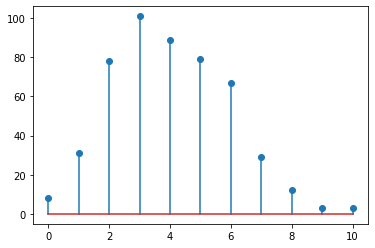

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.stem(np.bincount(x));

## 2. Other distributions with scipy

### 2.1. Special functions
Many raw statistical routines (cumulative, survival and inverse functions) are available in the [scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html#raw-statistical-functions) mudule.

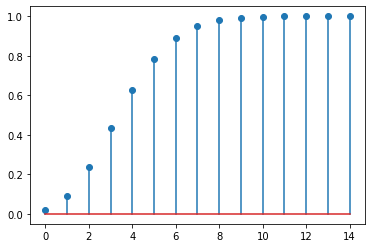

In [17]:
from scipy import special

plt.stem(special.pdtr(range(15), 4));  # Poisson cumulative distribution function

### Random variables
[Scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html) implements random variables with two different classes: [*continuous random variables*](http://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous.html#continuous-random-variables) and [*discrete random variables*](http://docs.scipy.org/doc/scipy/reference/tutorial/stats/discrete.html#discrete-random-variables).
As an example, we focus here on the gamma distribution and illustrate the main methods available.

In [18]:
from scipy.stats import gamma

# gamma is a r.v. object corresponding to the standard gamma distribution
print("Distribution support: [{}, {}]".format(gamma.a, gamma.b))
print("Number of shape parameters: {} (name: {})".format(gamma.numargs, gamma.shapes))

Distribution support: [0.0, inf]
Number of shape parameters: 1 (name: a)


The shape parameter $a$ appears in the probability density function:
<!-- $$f(x; a, \lambda) = x^{a-1}\exp(-\lambda x) \frac{\lambda^a}{\Gamma(a)}.$$ -->
$$f(x; a) = \frac{x^{a-1}\exp(-x)}{\Gamma(a)}.$$

Since the shape parameter $a$ is required, one has to specify it for each method.

In [19]:
print("Mean:", gamma.mean(a=4))
print("Median:", gamma.median(a=4))
print("Variance:", gamma.var(a=4))

Mean: 4.0
Median: 3.672060748850897
Variance: 4.0


Two other parameters can be passed to the methods: *loc* and *scale*.
They correspond to shifting and rescaling the input of the pdf with 
$x \mapsto \frac{x - loc}{scale}.$

In [20]:
print("Mean:", gamma.mean(a=4, loc=2, scale=0.1))

Mean: 2.4


Since, passing those parameters time and again can become quite bothersome, one can freeze a random variable:

In [21]:
rv = gamma(a=4, loc=2, scale=2)
print("Mean:", rv.mean())

Mean: 10.0


Now, let us have a look to the available methods.

In [22]:
print(rv.rvs(size=10))  # Drawn a random sample

[ 6.56 13.66  8.66 16.67 10.84  6.82 12.49 12.34  3.48 16.34]


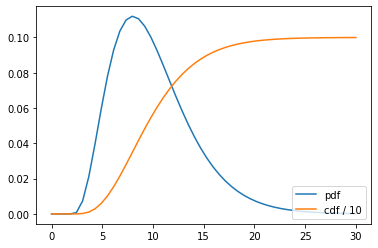

In [24]:
x = np.linspace(0, 30, num=50)

plt.plot(x, rv.pdf(x), label='pdf')  # Probability density function
plt.plot(x, rv.cdf(x)/10, label='cdf / 10')  # Cumulative density function
plt.legend(loc="lower right");

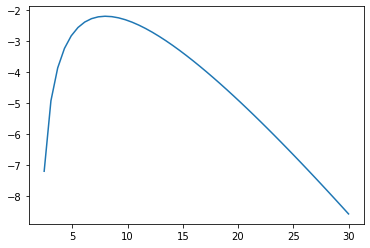

In [25]:
plt.plot(x, rv.logpdf(x), label='log pdf');  # Log of the pdf

## 3. Descriptive statistics

### 2.1. Usual statistics
Basic descriptive statistics such as min, max, mean, median, std, variance and percentiles can be computed with [array methods](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html) or routines from [Numpy](http://docs.scipy.org/doc/numpy/reference/routines.statistics.html).
Other empirical statistics such as mode and moments can be obtained with [Scipy statistical functions](http://docs.scipy.org/doc/scipy/reference/stats.html#statistical-functions).

### 2.2. Histograms
A common task in statisics is to estimate the pdf of a random variable, what is called density estimation.
In a first approach, this task can be achieved by computing a histogram.

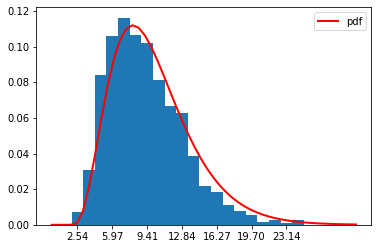

In [28]:
x = rv.rvs(size=1000)  # Draw a random sample

# Plot the histogram
hist, bins = np.histogram(x, bins=20, normed=True)
plt.bar(bins[:-1], hist, width=bins[1]-bins[0])
plt.xticks(bins[::3], ["{0:0.2f}".format(t) for t in bins[::3]]);

x_pdf = np.linspace(0, 30, num=50)
plt.plot(x_pdf, rv.pdf(x_pdf), color="red", linewidth=2, label="pdf")
plt.legend();

Alternatively,one can use Matplotlib to produce fancy plots:

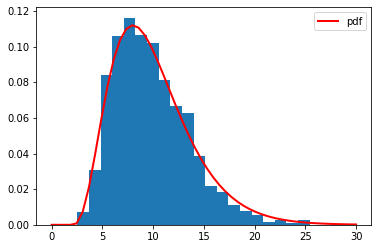

In [29]:
(hist_plt, bins_plt, patches) = plt.hist(x, bins=20, normed=True)
plt.plot(x_pdf, rv.pdf(x_pdf), color="red", linewidth=2, label="pdf")
plt.legend();

### 2.3. Kernel density estimation
Kernel desity estimation is a tool more efficient than a histogram for density estimation.
In Python kde can be performed with the *gaussian_kde* function.

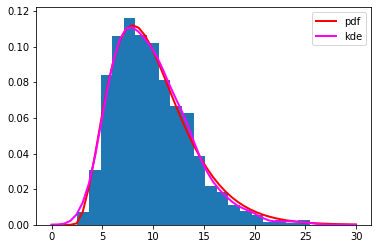

In [30]:
from scipy.stats import gaussian_kde

kde = gaussian_kde(x)

(hist_plt, bins_plt, patches) = plt.hist(x, bins=20, normed=True)
plt.plot(x_pdf, rv.pdf(x_pdf), color="red", linewidth=2, label="pdf")
plt.plot(x_pdf, kde(x_pdf), color="magenta", linewidth=2, label="kde")
plt.legend();

## 4. Hypothesis testing

### 4.1. Analyzing one sample

In python, a single sample may be analized with:
- ttest_1samp: T-test for the mean of one group of scores;
- kstest: Kolmogorov-Smirnov test for goodness of fit;
- ksone: General Kolmogorov-Smirnov one-sided test;
- chisquare: One-way chi square test;
- anderson: Anderson-Darling test for data coming from a particular distribution.

In [31]:
from scipy import stats

for rv in [stats.expon, stats.norm]:
    tt, pval = stats.ttest_1samp(rv.rvs(size=100), 0)
    print("{} sample: ".format(rv.name), end="")
    print("p-value = {0:0.2f} (statistics = {1:0.2f})".format(pval, tt))

expon sample: p-value = 0.00 (statistics = 11.31)
norm sample: p-value = 0.69 (statistics = -0.40)


On the one hand, the p-value for the exponential sample is small enough that we can reject the null hypothesis that the mean is $0$.
On the other hand, with high significance levels, we cannot reject the null hypothesis for the normal sample (this is comforting !).

Let us now test for a given distribution:

In [32]:
for rv in [stats.expon, stats.norm]:
    tt, pval = stats.kstest(rv.rvs(size=100), 'expon')
    print("{} sample: ".format(rv.name), end="")
    print("p-value = {0:0.2f} (statistics = {1:0.2f})".format(pval, tt))

expon sample: p-value = 0.43 (statistics = 0.09)
norm sample: p-value = 0.00 (statistics = 0.51)


Again, the result is as expected.

### 4.2. Testing normality
As a special case, several tests exist for assessing the normality of a sample:
- kurtosistest: Tests whether a dataset has normal kurtosis;
- skewtest: Tests whether the skew is different from the normal distribution;
- normaltest: Tests whether a sample differs from a normal distribution (D'Agostino and Pearson's test);
- jarque_bera: Jarque-Bera goodness of fit test on sample data;
- shapiro: Shapiro-Wilk test for normality.

In [33]:
for rv in [stats.expon, stats.norm]:
    print("{} sample:".format(rv.name))
    for name, test in [('skew', stats.skewtest), ('kurtosis', stats.kurtosistest)]:
        tt, pval = test(rv.rvs(size=100))
        print("   normal {} test: ".format(name), end="")
        print("   p-value = {0:0.2f} (statistics = {1:0.2f})".format(pval, tt))

expon sample:
   normal skew test:    p-value = 0.00 (statistics = 5.37)
   normal kurtosis test:    p-value = 0.00 (statistics = 4.43)
norm sample:
   normal skew test:    p-value = 0.30 (statistics = 1.03)
   normal kurtosis test:    p-value = 0.80 (statistics = 0.25)


Note that these two tests are combined in the normality test:

In [34]:
for rv in [stats.expon, stats.norm]:
    tt, pval = stats.normaltest(rv.rvs(size=100))
    print("{} sample: ".format(rv.name), end="")
    print("p-value = {0:0.2f} (statistics = {1:0.2f})".format(pval, tt))

expon sample: p-value = 0.00 (statistics = 44.27)
norm sample: p-value = 0.57 (statistics = 1.13)


### 4.3. Comparing two samples
Again, many tests for two samples are available in the Scipy.stats module:
- ks_2samp: Kolmogorov-Smirnov test for 2 samples;
- ttest_ind: T-test for the means of two independent samples of scores;
- kstwobign: Kolmogorov-Smirnov two-sided test for large N;
- ttest_ind_from_stats: T-test for means of two independent samples from descriptive statistics;
- ttest_rel: T-test on TWO RELATED samples of scores, a and b;
- mannwhitneyu: Mann-Whitney rank test on samples x and y;
- wilcoxon: Wilcoxon signed-rank test;
- kruskal: Kruskal-Wallis H-test for independent samples;
- ansari: Ansari-Bradley test for equal scale parameters;
- bartlett: Bartlett's test for equal variances;
- levene: Levene test for equal variances;
- anderson_ksamp: Anderson-Darling test for k-samples;
- fligner: Fligner-Killeen test for equality of variances;
- median_test: Mood's median test;
- mood: Mood's test for equal scale parameters.

As an example, on can test that two independent samples have identical means or that two independent samples are drawn from tre same continuous distribution:

In [35]:
rvs1 = stats.norm.rvs(size=100, loc=0., scale=1)
rvs2 = stats.norm.rvs(size=200, loc=0.1, scale=2)

tt, pval = stats.ttest_ind(rvs1,rvs2)
print("p-value = {0:0.2f} (statistics = {1:0.2f})".format(pval, tt))

p-value = 0.45 (statistics = 0.76)


Here, the p-value is high enough that we cannot reject the null hypothesis that the two samples have identical average values.
On the other hand, the following statistical test makes it possible to state that the two samples are drawn from different distribution (we reject the null hypothesis that they come from the same distribution):

In [36]:
tt, pval = stats.ks_2samp(rvs1, rvs2)
print("p-value = {0:0.2f} (statistics = {1:0.2f})".format(pval, tt))

p-value = 0.10 (statistics = 0.15)


### 4.4. Other tests
- pearsonr: Pearson correlation coefficient and the p-value for testing non-correlation;
- spearmanr: Spearman rank-order correlation coefficient and the p-value to test for non-correlation;
- power_divergence: Cressie-Read power divergence statistic and goodness of fit test;
- friedmanchisquare: Friedman test for repeated measurements;
- chi2_contingency: Chi-square test of independence of variables in a contingency table;
- fisher_exact: Fisher exact test on a 2x2 contingency table.

## 5. Linear models

[StatsModels](http://statsmodels.sourceforge.net/stable/index.html) is a scientific module based on Pandas for performing statistical analyses in Python.
It provides tools for conducting data exploration, statistical tests and for the estimation of several statistical models.
As a statistical package, each estimator in StatsModels comes with an extensive list of result statistics.


### 5.1. Linear regression
We illustrate here a major feature of StatsModels, which is [linear regression](http://www.statsmodels.org/stable/regression.html#technical-documentation).

In [76]:
import numpy as np
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt
%matplotlib inline

# Generate data
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

In [77]:
# Fit the model
model = sm.OLS(y, X)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     277.2
Date:                Mon, 03 May 2021   Prob (F-statistic):           1.88e-29
Time:                        08:02:55   Log-Likelihood:                -28.035
No. Observations:                  50   AIC:                             64.07
Df Residuals:                      46   BIC:                             71.72
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5038      0.023     21.687      0.000       0.457       0.551
x2             0.3745      0.091      4.100      0.000       0.191       0.558
x3            -0.0214      0.002    -10.501      0.000      -0.026      -0.017
const          4.9540      0.151     32.887      0.000       4.651       5.257
==============================================================================
Omnibus:                        1.909   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.845
Skew:                           0.432   Prob(JB):                        0.398
Kurtosis:                       2.627   Cond. No.                         221.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Main attributes of the fitted model are:

In [78]:
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.fittedvalues)

Parameters:  [ 0.5   0.37 -0.02  4.95]
Standard errors:  [0.02 0.09 0.   0.15]
Predicted values:  [ 4.42  4.86  5.26  5.62  5.91  6.13  6.29  6.4   6.49  6.58  6.69  6.85
  7.05  7.32  7.62  7.95  8.29  8.6   8.87  9.07  9.21  9.28  9.3   9.29
  9.26  9.25  9.28  9.36  9.49  9.67  9.88 10.11 10.32 10.5  10.62 10.68
 10.66 10.59 10.48 10.34 10.21 10.12 10.06 10.06 10.11 10.21 10.32 10.43
 10.52 10.55]


A method called *predict* is also available for prediction with the estimator:

In [79]:
res.predict(X)  # Same as res.fittedvalues

array([ 4.42,  4.86,  5.26,  5.62,  5.91,  6.13,  6.29,  6.4 ,  6.49,
        6.58,  6.69,  6.85,  7.05,  7.32,  7.62,  7.95,  8.29,  8.6 ,
        8.87,  9.07,  9.21,  9.28,  9.3 ,  9.29,  9.26,  9.25,  9.28,
        9.36,  9.49,  9.67,  9.88, 10.11, 10.32, 10.5 , 10.62, 10.68,
       10.66, 10.59, 10.48, 10.34, 10.21, 10.12, 10.06, 10.06, 10.11,
       10.21, 10.32, 10.43, 10.52, 10.55])

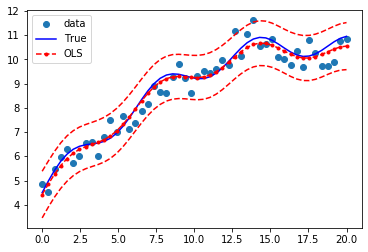

In [80]:
# Plot the regression

prstd, iv_l, iv_u = wls_prediction_std(res)  # Curves for standard deviation

plt.plot(x, y, 'o', label="data")
plt.plot(x, y_true, 'b-', label="True")
plt.plot(x, res.fittedvalues, 'r--.', label="OLS")
plt.plot(x, iv_u, 'r--')
plt.plot(x, iv_l, 'r--')
plt.legend(loc='best');

In [81]:
residues = y - res.predict(X)  # Same as res.resid
print(residues)

[ 0.42 -0.35  0.23  0.36  0.41 -0.42 -0.25  0.15  0.1  -0.56  0.11  0.67
 -0.04  0.36 -0.48 -0.56 -0.43 -0.45  0.06 -0.4  -0.58 -0.03  0.5  -0.06
 -0.66  0.08  0.24  0.08  0.11  0.33 -0.09  1.09 -0.17  0.54  1.   -0.1
 -0.01  0.28 -0.39 -0.33 -0.46  0.24 -0.38  0.74  0.14 -0.47 -0.59 -0.55
  0.25  0.3 ]


The sum of squared residuals (or residual sum of squares) is:

In [82]:
print(np.sum(res.resid**2), res.ssr)

8.984845765637813 8.984845765637813


while an unbiased estimate of the variance is:

In [83]:
print(res.ssr / res.df_resid)  # Same as res.scale

0.19532273403560463


The hat (or projection matrix) is:

In [84]:
H = X.dot(np.linalg.solve(X.T.dot(X), X.T))

Then, the studentized residuals are:

In [85]:
t = res.resid / np.sqrt(res.scale*(1-np.diag(H)))  # Standardized residuals
ts = t * np.sqrt( (res.df_resid-1) / (res.df_resid-t**2))  # Studentized residuals
print(ts)  # Similar to res.outlier_test()[:, 0]

[ 1.06 -0.84  0.56  0.86  0.99 -1.   -0.59  0.34  0.23 -1.31  0.26  1.62
 -0.1   0.83 -1.12 -1.3  -0.99 -1.06  0.14 -0.93 -1.38 -0.06  1.16 -0.13
 -1.54  0.18  0.57  0.19  0.25  0.76 -0.21  2.68 -0.39  1.27  2.5  -0.24
 -0.01  0.64 -0.89 -0.76 -1.07  0.56 -0.89  1.82  0.33 -1.12 -1.41 -1.35
  0.62  0.76]


[]

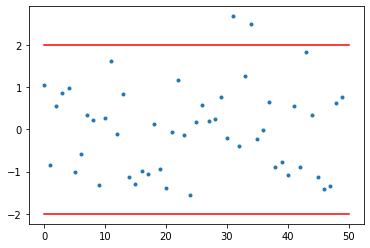

In [86]:
plt.figure()
plt.plot(ts, '.')
plt.plot([0, X.shape[0]], [-2]*2, 'r')
plt.plot([0, X.shape[0]], [2]*2, 'r')
outliers = np.where(res.outlier_test()[:, -1]<0.1)
plt.plot(outliers, res.outlier_test()[outliers, 0], 'ro')

Note that studentized residuals are only asymptotically normal.

In [87]:
from scipy.stats import normaltest, probplot

print(normaltest(ts))

NormaltestResult(statistic=2.3136168144834395, pvalue=0.3144882994338331)


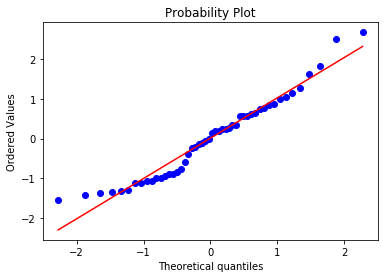

In [88]:
from scipy.stats import t as student_dist

probplot(ts, dist=student_dist(df=res.df_resid-1), plot=plt);

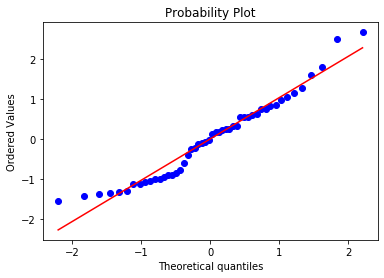

In [89]:
probplot(ts, dist='norm', plot=plt);

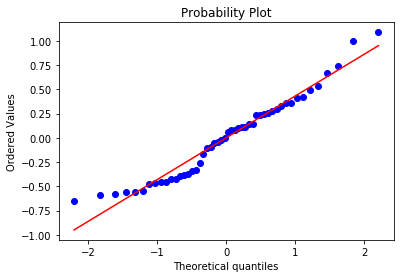

In [90]:
probplot(res.resid, dist='norm', plot=plt);

## References
- [StatsModels documentation](http://statsmodels.sourceforge.net/stable/index.html).
- [Scipy lecture notes](http://www.scipy-lectures.org/index.html).
- To go further: [advanced visualization with Seaborn](https://stanford.edu/~mwaskom/software/seaborn/tutorial.html).